# The aerodynamic center of a finite wing

We will use the Python language to work out our examples, so we set up some Python tools first.

In [81]:
# Set up the notebook and import required Python packages
%run ./src/aerodynamic_center_wing/init.py
%matplotlib inline

For a finite wing we define an axis orthogonal to the wing's symmetry plane and passing through the point $P_{\mathrm{ac,W}}$ of coordinates $(X_{\mathrm{ac,W}},0,0)$. The pitching moment coefficient about this axis does not vary with the angle of attack and $P_{\mathrm{ac,W}}$ is colled the aerodynamic center of the wing.


The coordinate $X_{\mathrm{ac,W}}$ si given by the following formula:

\begin{equation}
X_{\mathrm{ac,W}} = X_{\mathrm{le},\bar{c}} + K_1 \, \Big( \frac{X_{\mathrm{ac}}'}{c_{\mathrm{r}}} - K_2\Big)\,\bar{c}
\end{equation}

where $X_{\mathrm{le},\bar{c}}$ is the leading edge location of the mean aerodynamic chord $\bar{c}$, calculated as follows:

\begin{equation}
X_{\mathrm{le},\bar{c}} = \frac{2}{S} \int_{0}^{b/2} X_{\mathrm{le}}(y) \, c(y) \, \mathrm{d}y
\end{equation}

The non dimensional quantities $K_1$, $K_2$ and $X_{\mathrm{ac}}'/c_{\mathrm{r}}$ are functions of wing's shape ($\lambda$, $\Lambda_{\mathrm{le}}$, AR) and flight Mach number $M_{\infty}$. They have to be interpolated over tabulated data or can be read from a set of graphs.

# Functions $K_1$, $K_2$ and $X_{\mathrm{ac}}'/c_{\mathrm{r}}$

Let us know import the digitized data necessary to work out our numerical examples.

In [82]:
%run ./src/aerodynamic_center_wing/init.py
database = import_database_aerodynamic_center()
# report_database_dimensions(database)

The plot representing $K_1$ as a function of taper ratio $\lambda$ is reported below.

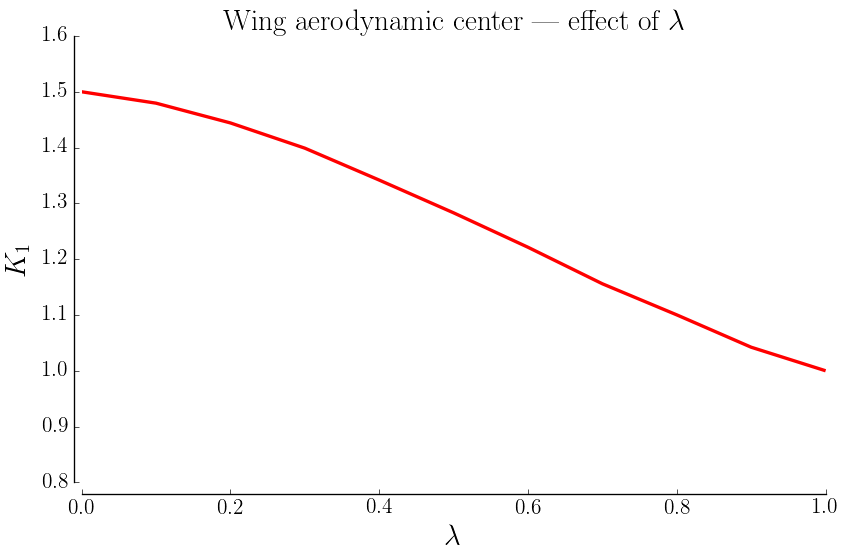

In [83]:
%run ./src/aerodynamic_center_wing/init.py
plot_K1(database['var0_K1'], database['data_K1'])

The plots representing $K_2$ as a function of leading edge sweep angle $\Lambda_{\mathrm{le}}$, aspect ratio AR, and taper ratio $\lambda$ are reported below.

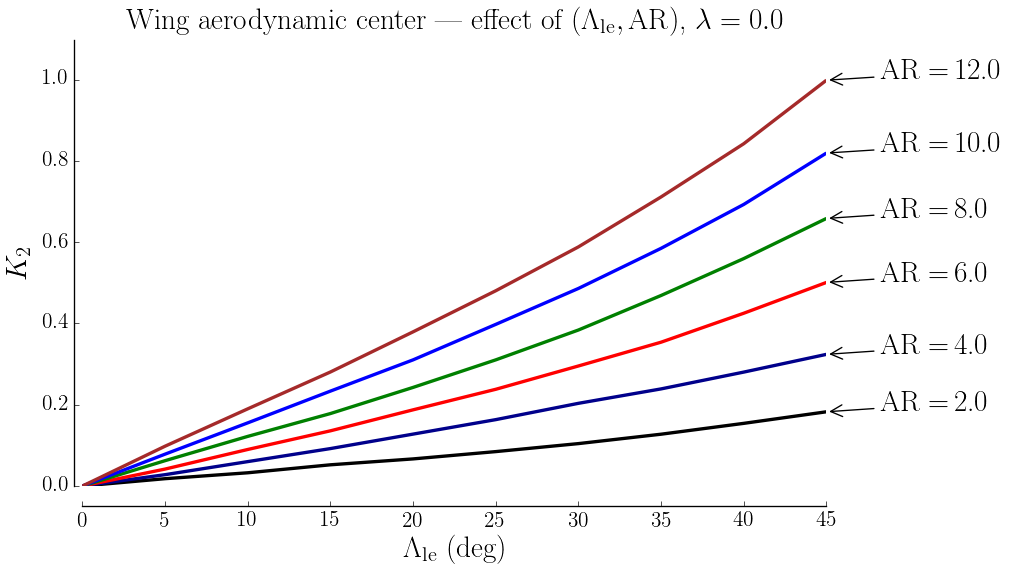

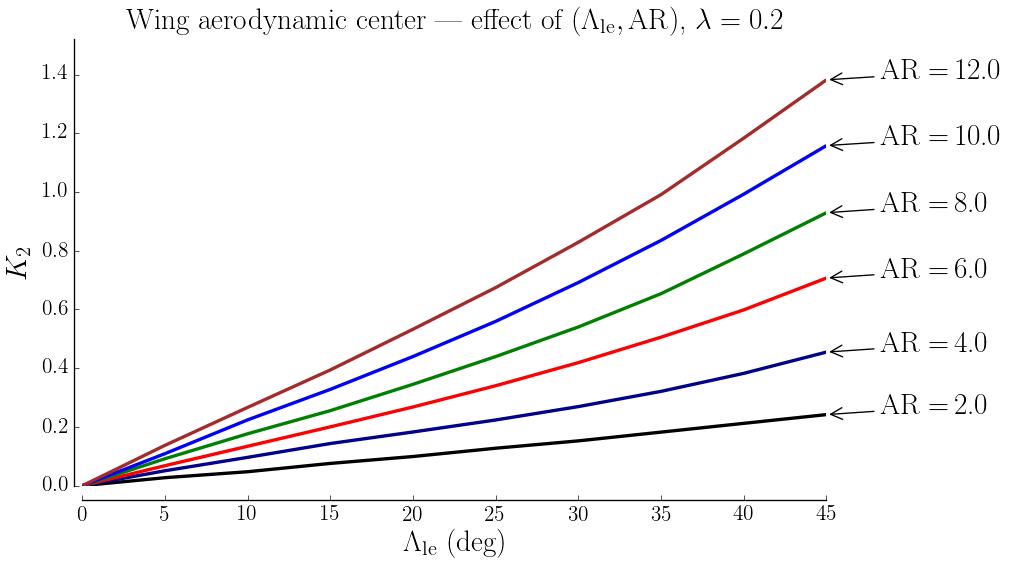

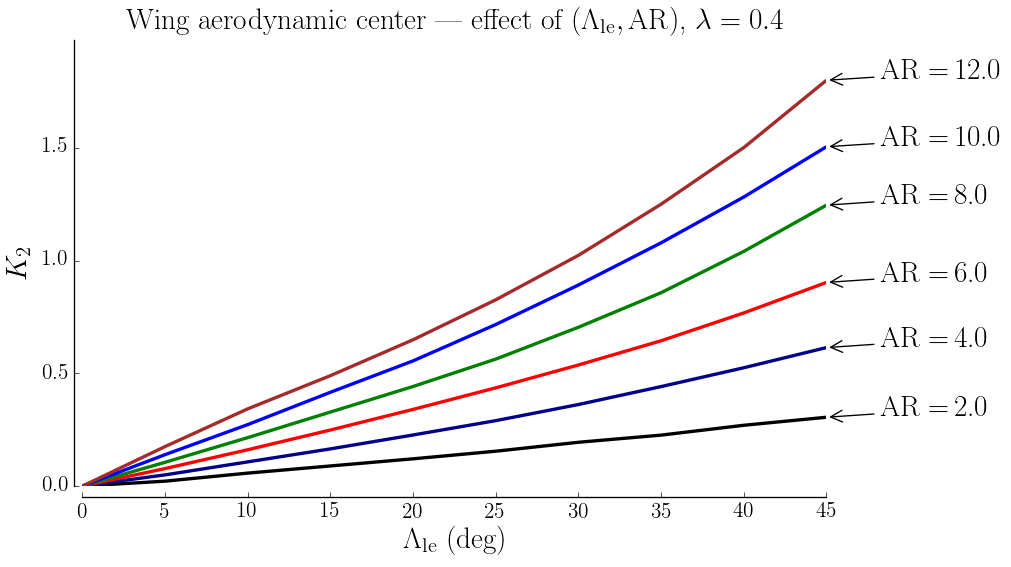

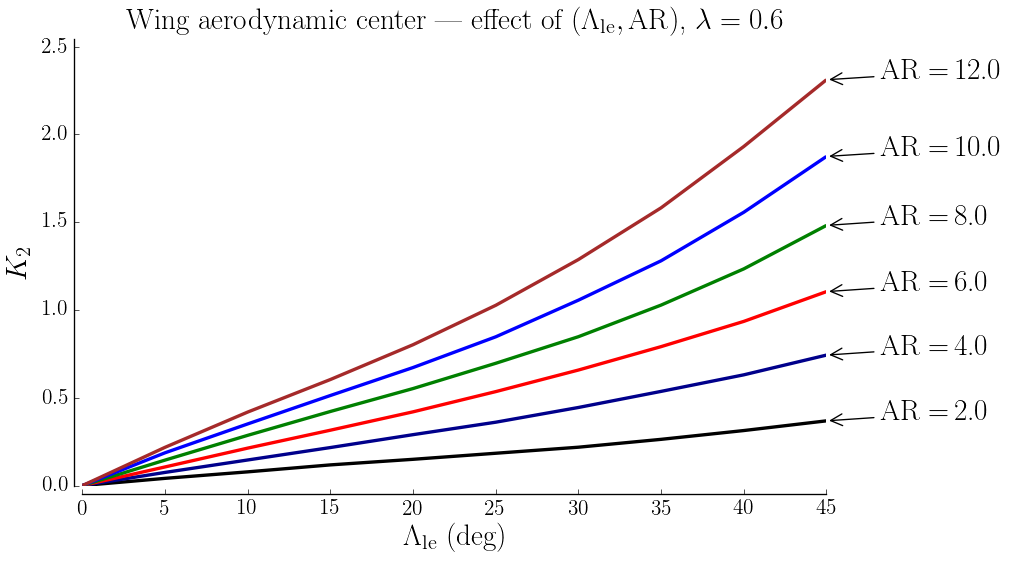

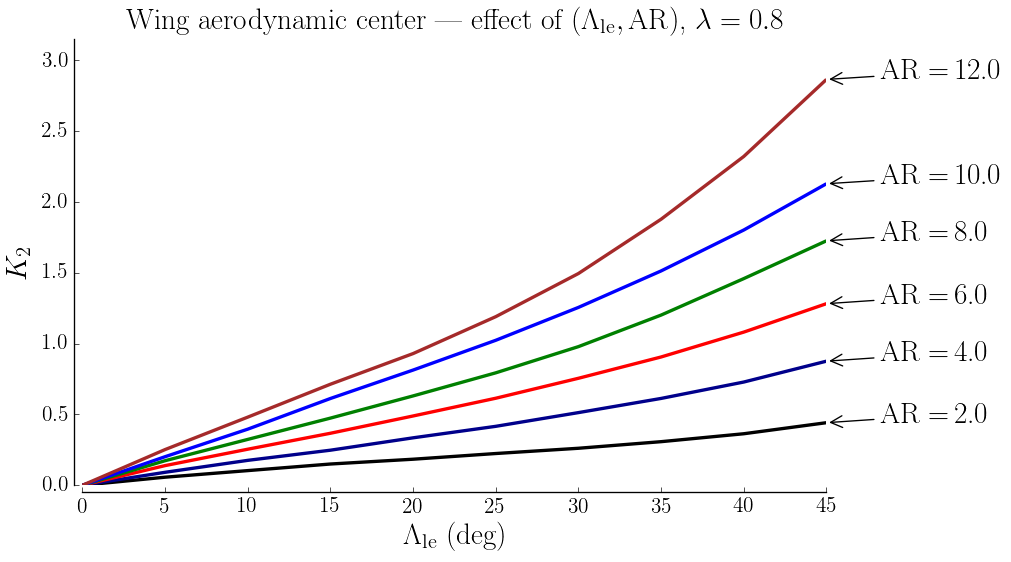

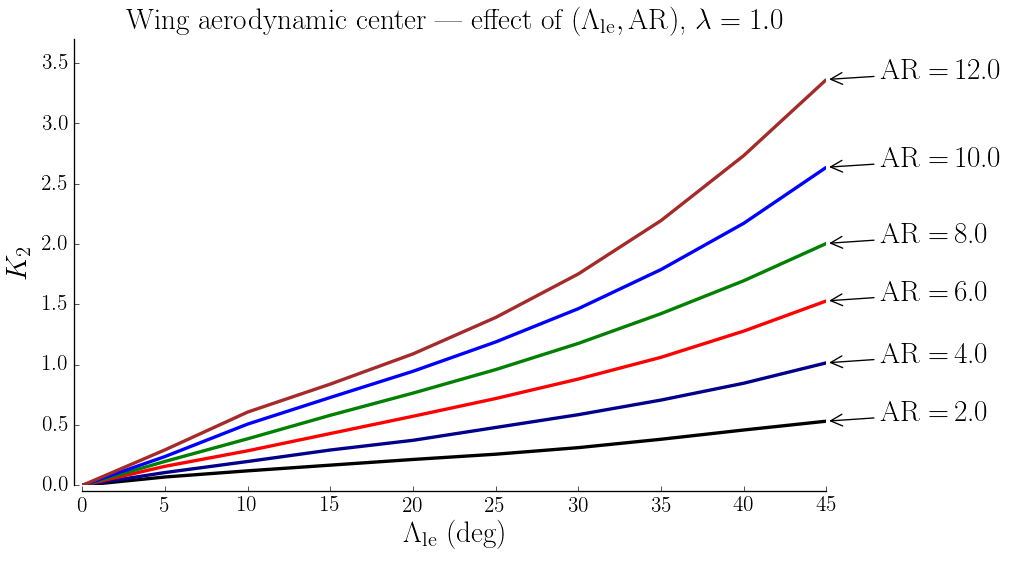

In [84]:
%run ./src/aerodynamic_center_wing/init.py
for j in range(0,6):
    plot_K2(database['var0_K2'], database['var1_K2'], database['var2_K2'], database['data_K2'], j)

The plots representing $X_{\mathrm{ac}}'/c_{\mathrm{r}}$ as a function of $(\tan\Lambda_{\mathrm{le}} )/\sqrt{1-M^2}$, $\mathrm{AR}\tan\Lambda_{\mathrm{le}}$, and $\lambda$ are reported below.

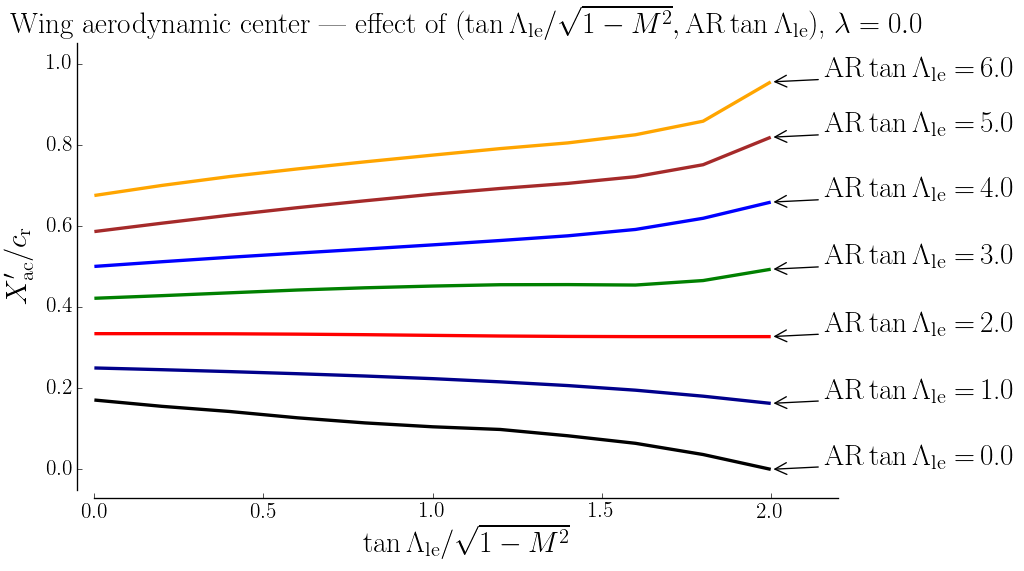

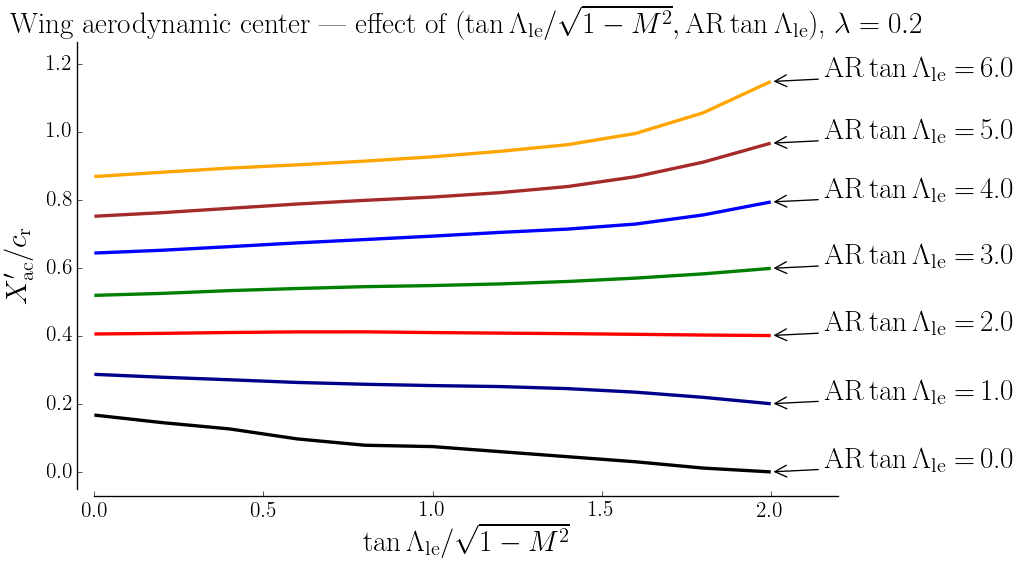

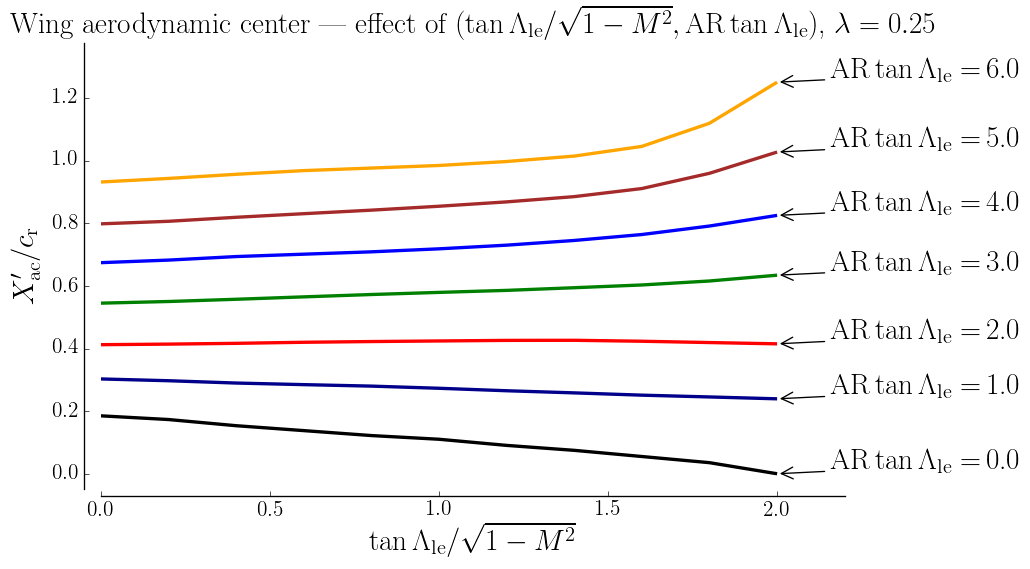

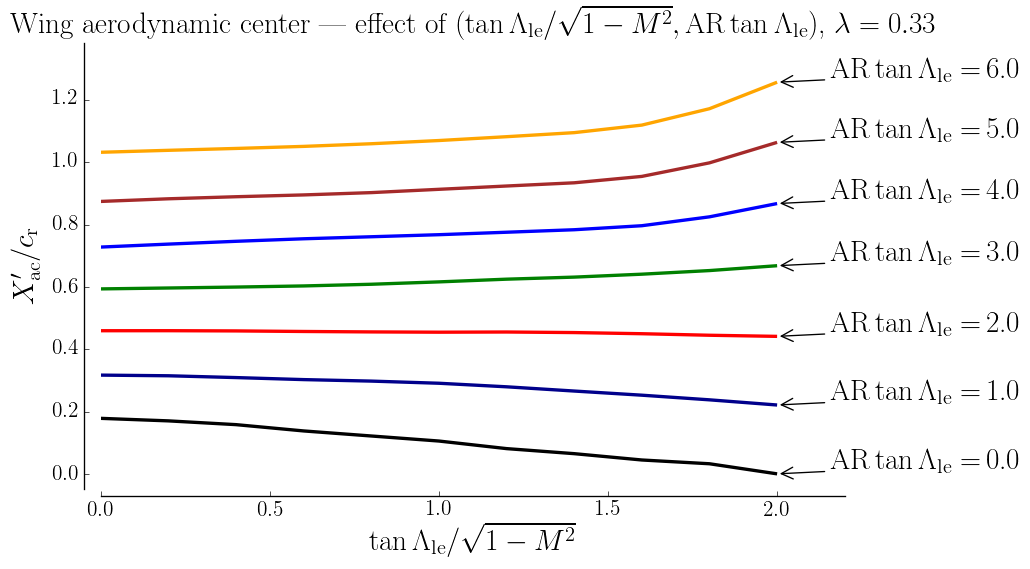

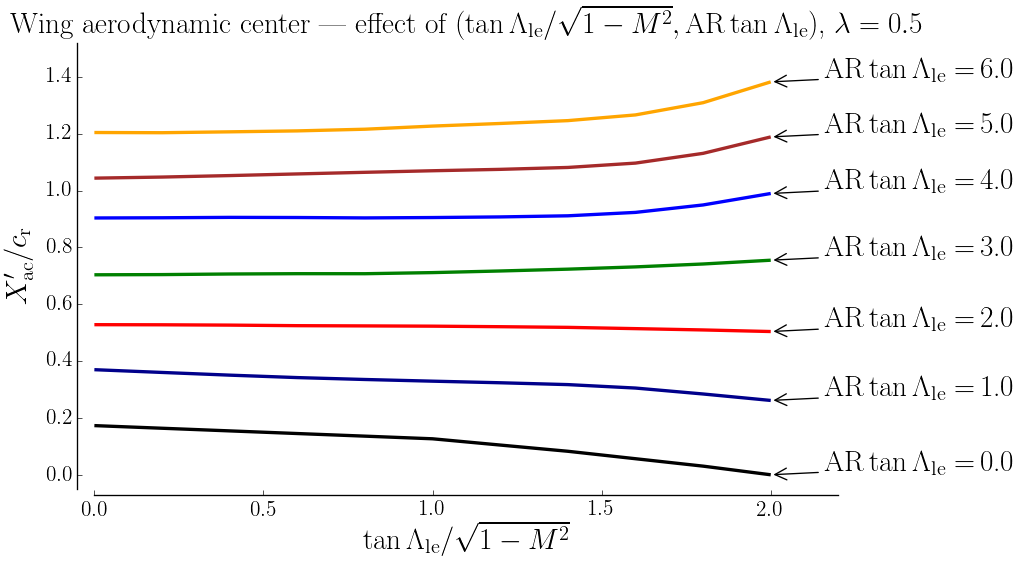

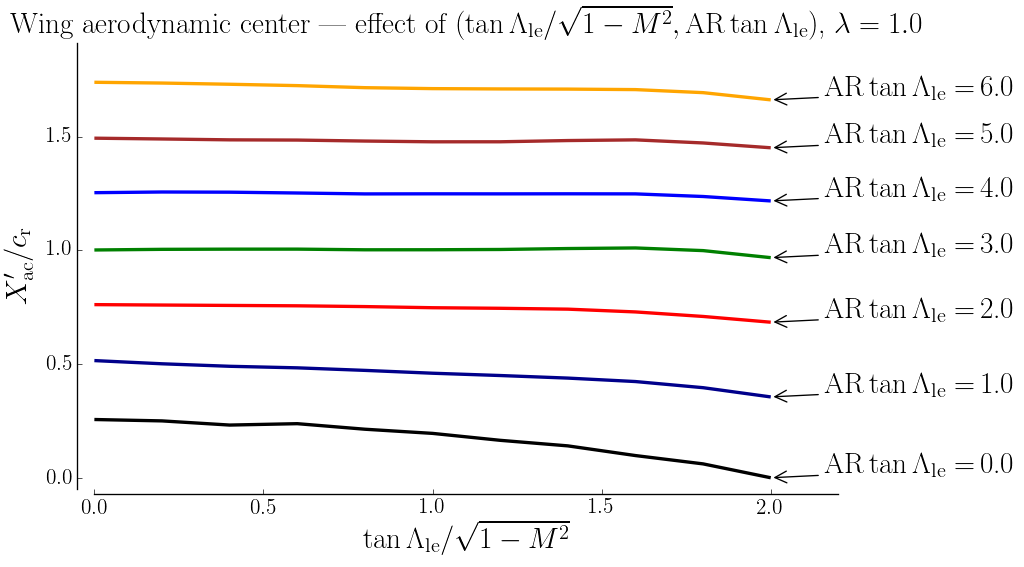

In [85]:
%run ./src/aerodynamic_center_wing/init.py
for j in range(0,6):
    plot_XacCr(database['var0_XacCr'], database['var1_XacCr'], database['var2_XacCr'], database['data_XacCr'], j)

## Numerical example

Let us now define a wing shape and calculate its aerodynamic center.

lambda = 0.5 --> K_1 = 1.2830300331115723


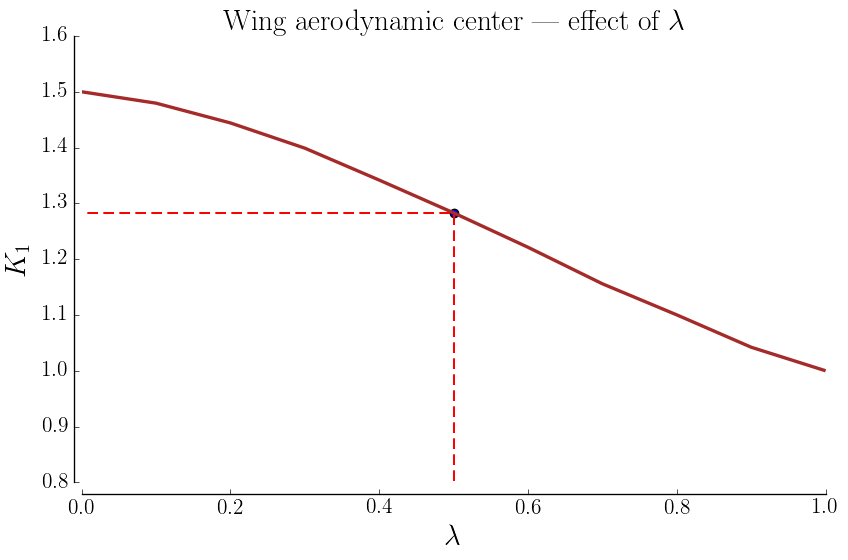

In [86]:
%run ./src/aerodynamic_center_wing/init.py
plot_interpolate_K1(database['var0_K1'], database['data_K1'],0.5)

Lambda_LE = 30.0 deg, AR = 5.0 --> K_2 = [ 0.24936651]


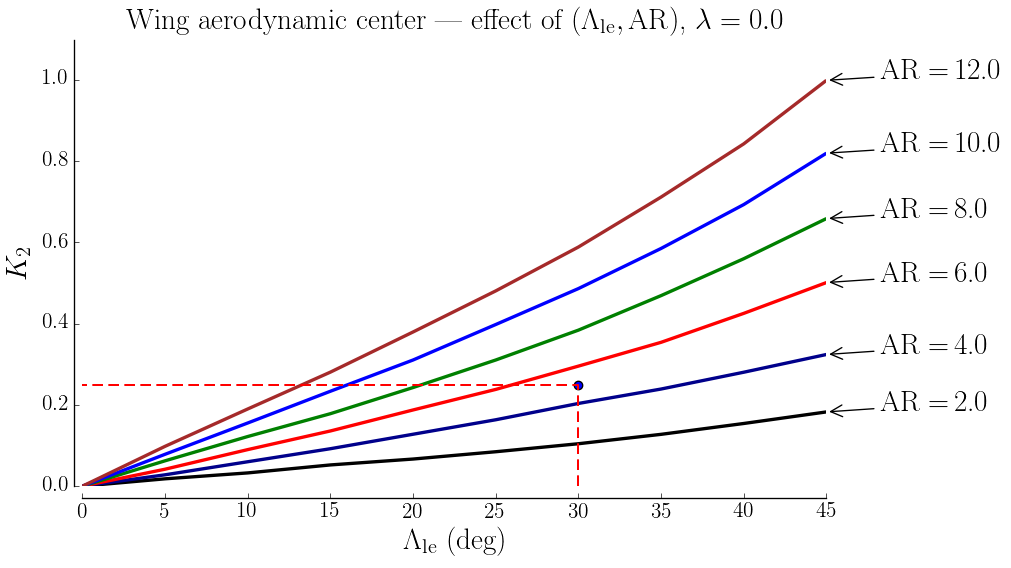

In [87]:
%run ./src/aerodynamic_center_wing/init.py
plot_interpolate_K2(database['var0_K2'], database['var1_K2'], database['var2_K2'], database['data_K2'], 0, 30.0, 5.0)

x_1 = tan(Lambda_LE)/sqrt(1-M^2) = 0.6465081838352359
x_2 = AR*tan(Lambda_LE) = 2.8867513459481287
 --> Xac'/c_r = [ 0.43165579]


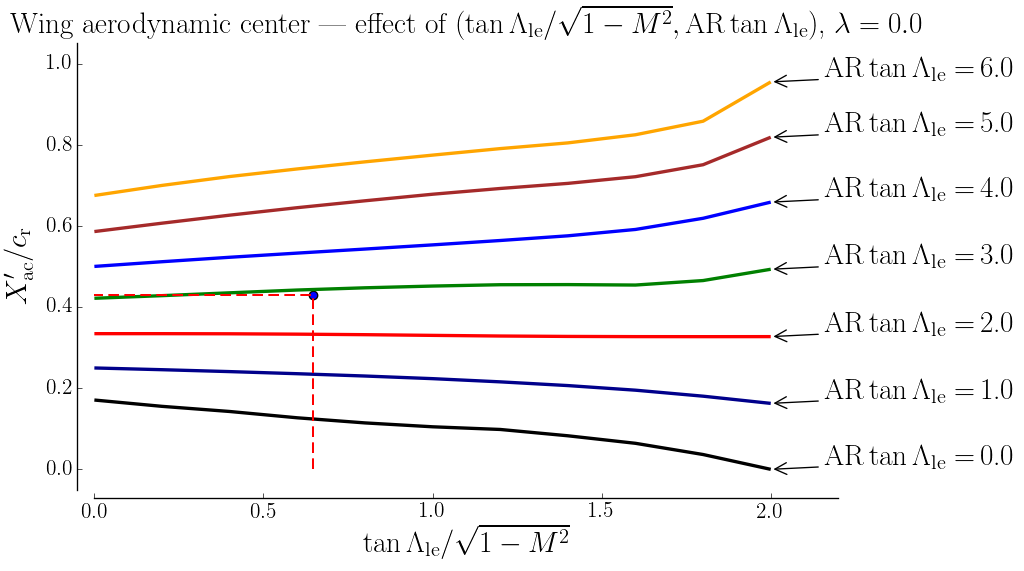

In [88]:
%run ./src/aerodynamic_center_wing/init.py
plot_interpolate_XacCr(
    database['var0_XacCr'], database['var1_XacCr'], database['var2_XacCr'], database['data_XacCr'], 0, 30.0, 5.0, 0.45)